## KNN Regression 

Author: J. Hickman

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

Number of Instances:
442

Number of Attributes:
First 10 columns are numeric predictive values

Target:
Column 11 is a quantitative measure of disease progression one year after baseline

Attribute Information:
* age age in years
* sex
* bmi body mass index
* bp average blood pressure
* s1 tc, total serum cholesterol
* s2 ldl, low-density lipoproteins
* s3 hdl, high-density lipoproteins
* s4 tch, total cholesterol / HDL* 
* s5 ltg, possibly log of serum triglycerides level
* s6 glu, blood sugar level

#### Import packages

In [2]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Load and check data

In [3]:
(X, y)=datasets.load_diabetes(return_X_y=True, scaled=False)
print(type(X),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [4]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [5]:
print(pd.DataFrame(X[0:10,:]))


      0    1     2      3      4      5     6     7       8     9
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.00  4.8598  87.0
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.00  3.8918  69.0
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.00  4.6728  85.0
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.00  4.8903  89.0
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.00  4.2905  80.0
5  23.0  1.0  22.6   89.0  139.0   64.8  61.0  2.00  4.1897  68.0
6  36.0  2.0  22.0   90.0  160.0   99.6  50.0  3.00  3.9512  82.0
7  66.0  2.0  26.2  114.0  255.0  185.0  56.0  4.55  4.2485  92.0
8  60.0  2.0  32.1   83.0  179.0  119.4  42.0  4.00  4.4773  94.0
9  29.0  1.0  30.0   85.0  180.0   93.4  43.0  4.00  5.3845  88.0


In [6]:
print(pd.DataFrame(y[0:10]))

       0
0  151.0
1   75.0
2  141.0
3  206.0
4  135.0
5   97.0
6  138.0
7   63.0
8  110.0
9  310.0


#### Normalization

In [7]:

#NORMALIZE 
X=0.1+(X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0))
y=0.1+(y-np.min(y,axis=0))/(np.max(y,axis=0)-np.min(y,axis=0))


In [8]:
# # INSERT CODE TO NORMALIZE THE FEATURES
# ux=np.mean(X,axis=0)
# sx=np.std(X,axis=0)
# uy=np.mean(y,axis=0)
# sy=np.std(y,axis=0)

# print("mean(x):\n",ux )
# print("std(x):\n",sx )

# print("mean(y) =",uy )
# print("std(x) =",sy )

# #NORMALIZE 
# X=5+(X-ux)/sx
# y=5+(y-uy)/sy

# #SANITY CHECK
# # print(np.mean(X,axis=0))
# # print(np.std(X,axis=0))

#### Numerical EDA

In [9]:
# CONVERT TO THE DATA FRAMES FOR PLOTTING
df=pd.DataFrame(np.hstack((X,y.reshape(y.shape[0],1))))

In [10]:
print(df.describe())

               0           1           2           3           4           5   \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean     0.591968    0.568326    0.446107    0.559817    0.551668    0.467725   
std      0.218484    0.499561    0.182567    0.194807    0.169647    0.151460   
min      0.100000    0.100000    0.100000    0.100000    0.100000    0.100000   
25%      0.420833    0.100000    0.314876    0.409859    0.429657    0.371165   
50%      0.616667    0.100000    0.418182    0.536620    0.536275    0.455578   
75%      0.766667    1.100000    0.565909    0.705634    0.652696    0.562649   
max      1.100000    1.100000    1.100000    1.100000    1.100000    1.100000   

               6           7           8           9           10  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean     0.460889    0.391996    0.585560    0.603942    0.496054  
std      0.167977    0.182010    0.183366    0.174187    0.240165 

In [11]:
print("X CORRELATION:")	
corr = df.corr(); print(corr)					#COMPUTE CORRELATION OF FEATER MATRIX

X CORRELATION:
          0         1         2         3         4         5         6   \
0   1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
1   0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
2   0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
3   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
4   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
5   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
6  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
7   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
8   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
9   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
10  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

          7         8         9         10  
0   0.203841  0.270774  0.3

#### Correlation matrix heatmap

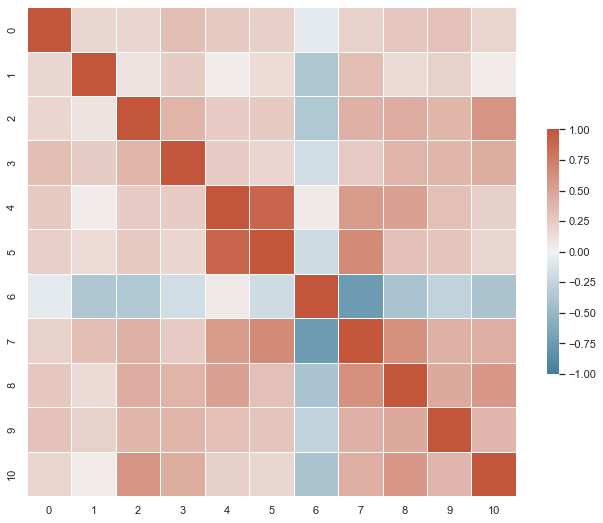

In [12]:
# INSERT CODE TO SHOW A HEAT MAP FOR THE X FEATURES

sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(11, 9))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

#### Multi-variable pair-plot

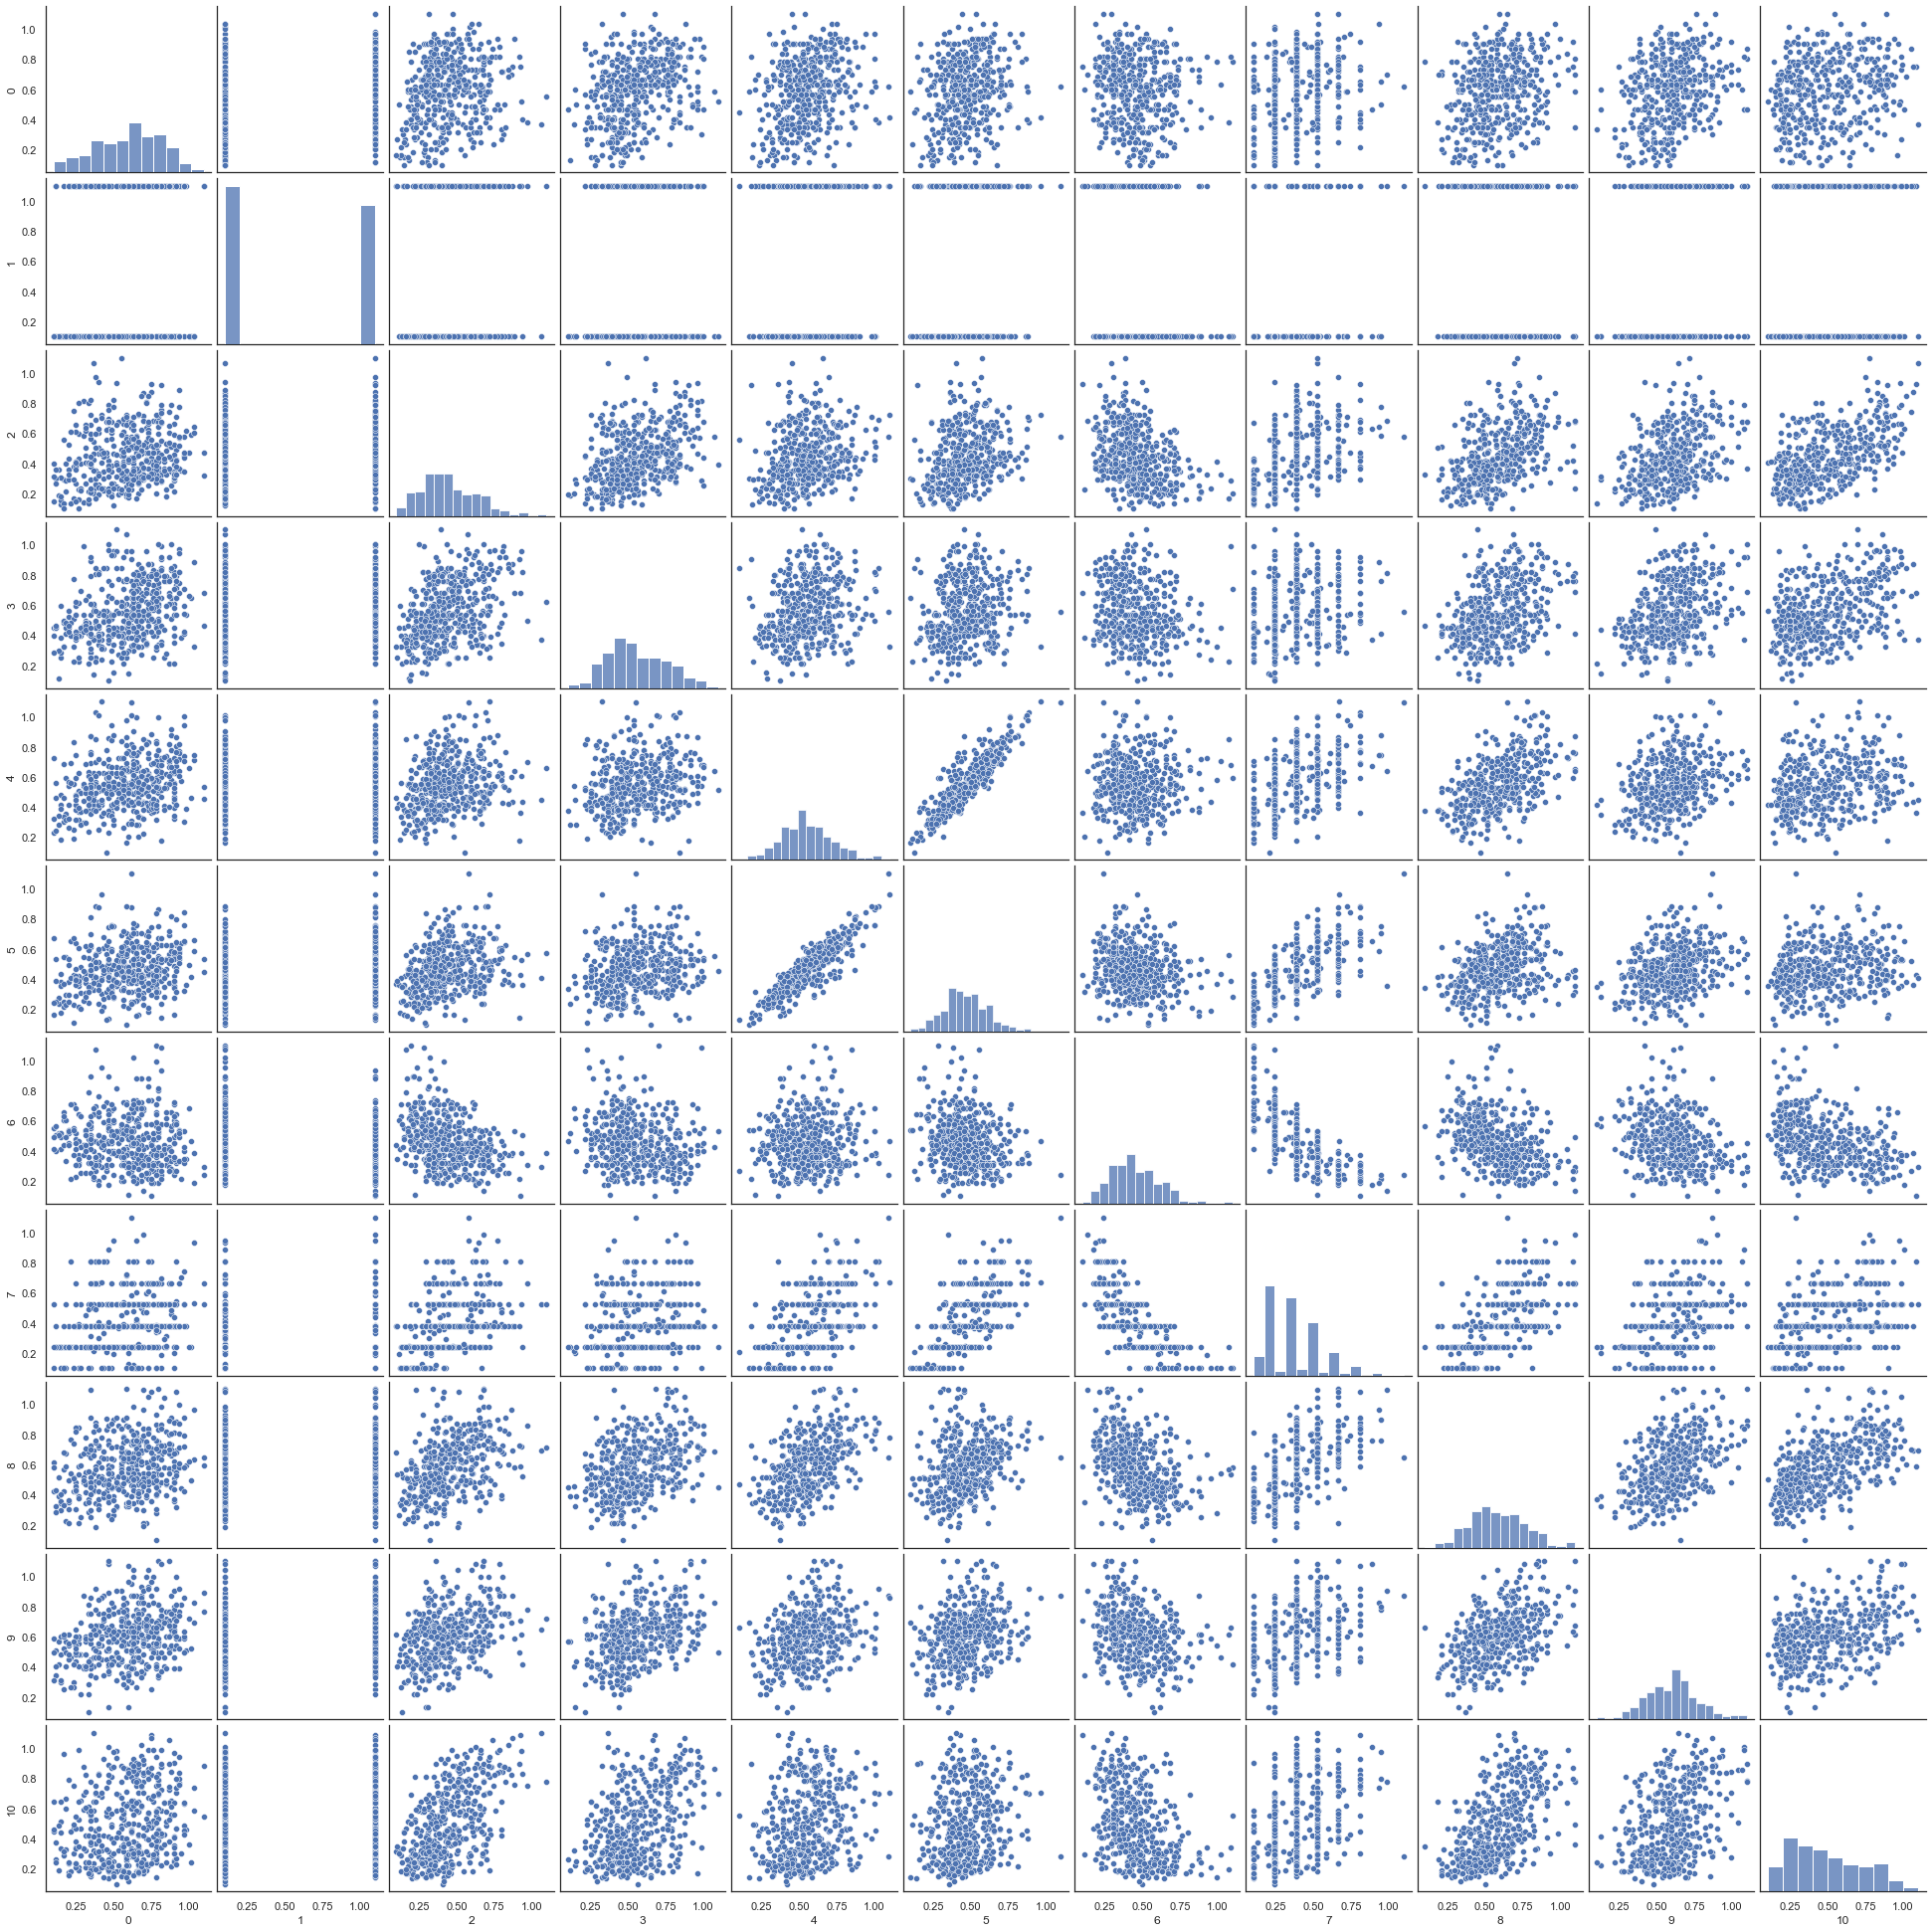

In [13]:
# # # INSERT CODE TO GENERATE A PAIR-PLOT 
sns.pairplot(df)
plt.show()


### Partition data

In [14]:
#DROP FIRST TWO FEATURES
X=X[:,2:]

from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

print("x_train.shape		:",x_train.shape)
print("y_train.shape		:",y_train.shape)

print("X_test.shape		:",x_test.shape)
print("y_test.shape		:",y_test.shape)

x_train.shape		: (353, 8)
y_train.shape		: (353,)
X_test.shape		: (89, 8)
y_test.shape		: (89,)


#### Hyper-Parameter tuning

* Goal: Find the optimal number of fitting parameters for KNN regression 

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

# HYPER PARAMETER SEARCH FOR OPTIMAL NUMBER OF NEIGHBORS 
num_neighbors_2=[]
train_error=[]
test_error=[]

# LOOP OVER HYPER-PARAM
for i in range(1,40):
    # INITIALIZE MODEL 
    model = KNeighborsRegressor(n_neighbors=i)

    # TRAIN MODEL 
    model.fit(x_train,y_train)

    # OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    # shift=1+np.min(y_train) #add shift to remove division by zero 
    err1=mean_absolute_error(y_train, yp_train) 
    err2=mean_absolute_error(y_test, yp_test) 
    
    # err1=100.0*np.mean(np.absolute((yp_train-y_train)/y_train))
    # err2=100.0*np.mean(np.absolute((yp_test-y_test)/y_test))

    num_neighbors_2.append(i)
    train_error.append(err1)
    test_error.append(err2)

    if(i%10==0):
        print("n_neighbors =",i)
        print(" train error:",err1)
        print(" test error:" ,err2)

n_neighbors = 10
 train error: 0.13357955397880206
 test error: 0.14816059365046028
n_neighbors = 20
 train error: 0.13730507532233724
 test error: 0.1446480450838321
n_neighbors = 30
 train error: 0.14187545412559313
 test error: 0.14326717771010536


### Convergence plot

Text(0, 0.5, 'Training (black) and test (blue) MAE (error)')

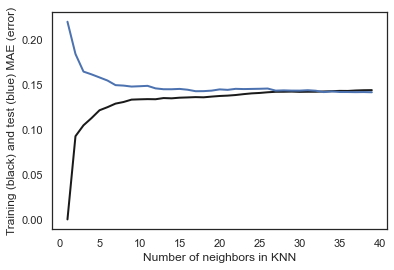

In [16]:
plt.plot(num_neighbors_2,train_error ,linewidth=2, color='k')
plt.plot(num_neighbors_2,test_error ,linewidth=2, color='b')

plt.xlabel("Number of neighbors in KNN")
plt.ylabel("Training (black) and test (blue) MAE (error)")

#### Re-train with optimal parameters

In [17]:
# INITIALIZE MODEL 
model = KNeighborsRegressor(n_neighbors=32)

# TRAIN MODEL 
model.fit(x_train,y_train)

# OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

err1=100*mean_absolute_error(y_train, yp_train) 
err2=100*mean_absolute_error(y_test, yp_test) 
    
print(" train error:",err1)
print(" test error:" ,err2)


 train error: 14.202970974204193
 test error: 14.314138576779026


### Parity Plot

* Plotting y_pred vs y_data lets you see how good the fit is

* The closer to the line y=x the better the fit (ypred=ydata --> prefect fit)

Text(0, 0.5, 'y_pred (blue=test)(black=Train)')

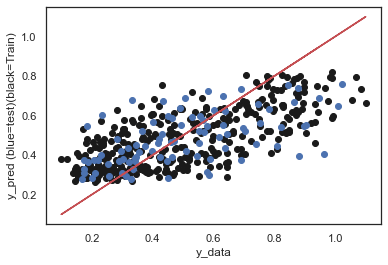

In [18]:
plt.plot(y_train,yp_train ,"o", color='k')
plt.plot(y_test,yp_test ,"o", color='b')
plt.plot(y_train,y_train ,"-", color='r')

plt.xlabel("y_data")
plt.ylabel("y_pred (blue=test)(black=Train)")

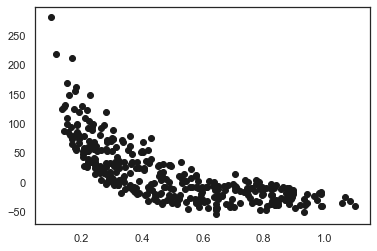

In [19]:
plt.plot(y_train,100*(yp_train-y_train)/y_train ,"o", color='k')
# plt.plot(y_test,yp_test ,"o", color='b')
# plt.plot(y_train,y_train ,"-", color='r')

# plt.xlabel("y_data")
# plt.ylabel("y_pred (blue=test)(black=Train)")

0


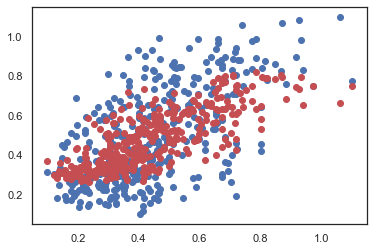

1


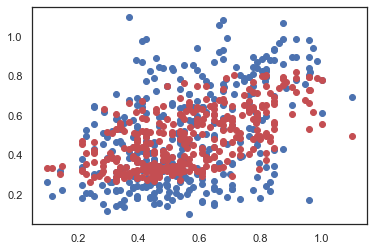

2


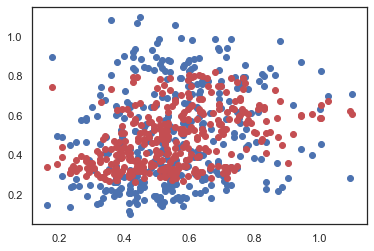

3


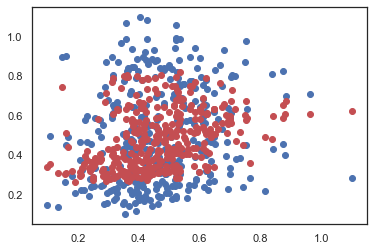

4


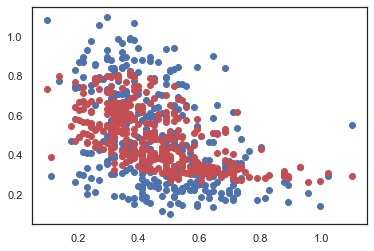

5


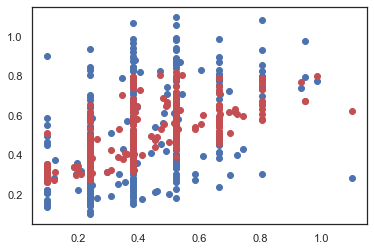

6


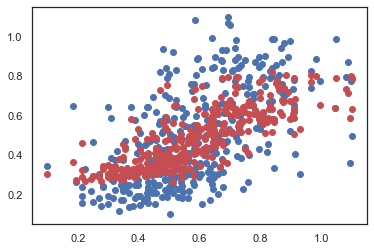

7


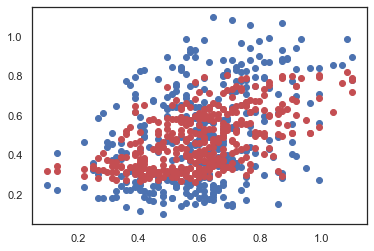

In [20]:
#loop over columns
for i in range(0,x_train.shape[1]):
    print(i)
    plt.plot(x_train[:,i],y_train ,"o", color='b')
    plt.plot(x_train[:,i],yp_train ,"o", color='r')
    plt.show()

In [21]:
# df=pd.DataFrame(np.hstack((x_train,yp_train.reshape(yp_train.shape[0],1))))

In [22]:
# sns.pairplot(df)
# plt.show()

 train error: 37.226889967413626
 test error: 34.453182157610605


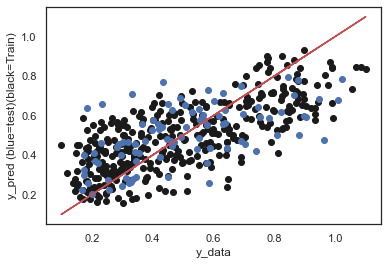

In [23]:
# LINEAR REGRESSION 
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)

# OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)

plt.plot(y_train,yp_train ,"o", color='k')
plt.plot(y_test,yp_test ,"o", color='b')
plt.plot(y_train,y_train,"-", color='r')

plt.xlabel("y_data")
plt.ylabel("y_pred (blue=test)(black=Train)")

    
err1=100.0*np.mean(np.absolute((yp_train-y_train)/y_train))
err2=100.0*np.mean(np.absolute((yp_test-y_test)/y_test))

print(" train error:",err1)
print(" test error:" ,err2)


In [24]:
# from sklearn.neural_network import MLPRegressor

# model = MLPRegressor(hidden_layer_sizes=(32,32,32),random_state=1, max_iter=10000).fit(x_train, y_train)

# # OUTPUT PREDICTIONS FOR TRAINING AND TEST SET 
# yp_train = model.predict(x_train)
# yp_test = model.predict(x_test)

# plt.plot(y_train,yp_train ,"o", color='k')
# plt.plot(y_test,yp_test ,"o", color='b')
# plt.plot(y_train,y_train,"-", color='r')

# plt.xlabel("y_data")
# plt.ylabel("y_pred (blue=test)(black=Train)")

    
# err1=100.0*np.mean(np.absolute((yp_train-y_train)/y_train))
# err2=100.0*np.mean(np.absolute((yp_test-y_test)/y_test))

# print(" train error:",err1)
# print(" test error:" ,err2)

